## Data Extraction For News Classification

The data for this task was gotten from [arisetv](https://www.arise.tv/), where news are grouped into different categories. The goal here to extract the news title and excerpt from news articles for different categories

In [1]:
# import the required dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request,sys,time

In [2]:
%%time
columns = ['Title', 'Excerpt', 'Category'] 
df = pd.DataFrame(columns = columns)  # initialize an empty dataframe with column names
base_url = 'https://www.arise.tv/'

categories =  ['health','business', 'politics', 'entertainment', 'sports', 'tech']  # news categories we are interested in

'''Search through each news based category in arisetv website and for each news article, extract the title and excerpt and append it to the dataframe'''
for cat in categories:
  for page_number in range(1, 170):
    url = base_url + cat + '/'  if page_number == 1 else base_url + cat + '/' + 'page/'+str(page_number) + '/'
    try:
      page=requests.get(url) 
    except Exception as e:    
      error_type, error_obj, error_info = sys.exc_info()      
      print ('ERROR FOR LINK:',url)               
      print (error_type, 'Line:', error_info.tb_lineno)
      continue
    if page.status_code == 200:
      soup = BeautifulSoup(page.text, "html.parser")
      articles = soup.find_all('article',attrs={'class':'jeg_post jeg_pl_lg_2 format-standard'})
      for article in articles:
        title = article.find('h3',attrs={'class':'jeg_post_title'}).get_text()
        excerpt = article.find('div',attrs={'class':'jeg_post_excerpt'}).get_text()
        df = df.append({'Title' : title, 'Excerpt' : excerpt, 'Category' : cat},
                ignore_index = True)

    # check progress 
    if page_number % 50 == 0:
        print(cat, page_number)

health 50
health 100
health 150
business 50
business 100
business 150
politics 50
politics 100
politics 150
ERROR FOR LINK: https://www.arise.tv/entertainment/page/34/
<class 'requests.exceptions.ConnectionError'> Line: 12
entertainment 50
entertainment 100
entertainment 150
ERROR FOR LINK: https://www.arise.tv/entertainment/page/166/
<class 'requests.exceptions.ConnectionError'> Line: 12
sports 50
sports 100
sports 150
tech 50
tech 100
tech 150
CPU times: user 1min 44s, sys: 4.73 s, total: 1min 48s
Wall time: 1h 42min 10s


In [3]:
df.head()

,Title,Excerpt,Category
0,\nWHO Reports First Two Cases of Marburg Virus...,\nThe WHO has reported two suspected cases of ...,health
1,\nNigeria: Six Confirmed Cases of Monkeypox in...,\nNasarawa State in Nigeria's North-Central ha...,health
2,\nNigeria Backs Global Efforts Against Marine ...,\nPresident Muhammadu Buhari has pledged Niger...,health
3,\nReconstruct Nigerian Drainages with Proper ...,\nA pest control specialist and malaria advoca...,health
4,\nNigeria: Kwara Records First Confirmed Case ...,\nThe Kwara State Government in Nigeria's Nort...,health


### Data Cleaning.

Now lets clean the data a little bit by removing '/n' and '... Read more'

In [4]:
df.head(2)

,Title,Excerpt,Category
0,\nWHO Reports First Two Cases of Marburg Virus...,\nThe WHO has reported two suspected cases of ...,health
1,\nNigeria: Six Confirmed Cases of Monkeypox in...,\nNasarawa State in Nigeria's North-Central ha...,health


In [5]:
def clean_text(text):

  '''
      function takes in a text and returns a clean version with both new line characters and readmore prompt removed

      input: str
      return : str
  '''
  text = text.replace('...\nRead more\n', '', -1)
  text = text.replace('\n', '')
  text = text.strip()
  return text

In [17]:
data = df.copy()  # create a copy of the data
# clean data
data['Title'] = data['Title'].map(lambda x : clean_text(x))
data['Excerpt'] = data['Excerpt'].map(lambda x : clean_text(x)) 

In [18]:
data.head()

,Title,Excerpt,Category
0,WHO Reports First Two Cases of Marburg Virus D...,The WHO has reported two suspected cases of Ma...,health
1,Nigeria: Six Confirmed Cases of Monkeypox in N...,Nasarawa State in Nigeria's North-Central has ...,health
2,Nigeria Backs Global Efforts Against Marine Pl...,President Muhammadu Buhari has pledged Nigeria...,health
3,Reconstruct Nigerian Drainages with Proper Se...,A pest control specialist and malaria advocate...,health
4,Nigeria: Kwara Records First Confirmed Case of...,The Kwara State Government in Nigeria's North-...,health


### Prepare Data

* Create new columns that maps categories to index
* shuffle the data based on the category
* split the data to train and test sets

In [19]:
str2int = {'health': 0,'business' : 1, 'politics': 2, 'entertainment': 3, 'sports' : 4, 'tech': 5}
data['labels'] = data['Category'].map(str2int)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
data = data.sample(frac = 1, random_state= 42)
train, test = train_test_split(data, test_size = 0.15, shuffle = True, stratify= data['Category'], random_state = 42)
train.reset_index()
test.reset_index()
train.head()

,Title,Excerpt,Category,labels
4440,Man United Reach Europa League Semi-finals as ...,Manchester United eased into the Europa League...,sports,4
3896,Australian Open: Nadal Comeback Win Over Medve...,Rafael Nadal has won a record-breaking 21st gr...,sports,4
4384,Man Utd vs Liverpool Match Postponed After ant...,Manchester United's clash with Liverpool on Su...,sports,4
4252,"Osaka, Nadal Both Withdraws From Wimbledon",The 2021 Wimbledon Championships will be witho...,sports,4
2442,Nigeria: CSO Accuses Desperate Politicians of ...,"A civil society organisation, Save Nigeria Pro...",politics,2


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### See distribution of target variable to verify our split

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


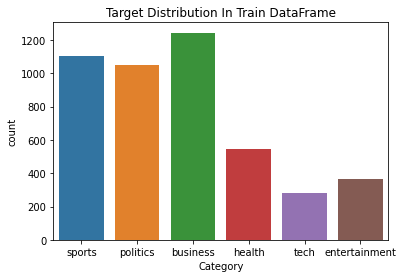

In [23]:
sns.countplot('Category', data = train)
plt.title('Target Distribution In Train DataFrame')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


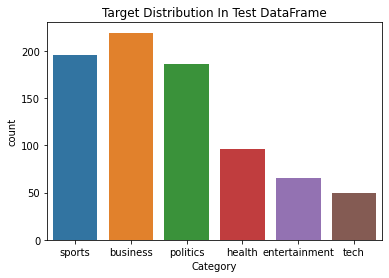

In [24]:
sns.countplot('Category', data = test)
plt.title('Target Distribution In Test DataFrame')
plt.show()

### Saving files as csv

In [25]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)